# Aggregate multiple datasets to one

Thsi section defines some stuff for running the script. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from results_helper import (
    MODELS, 
    MODELS_FULL,
    MODELS_SHORT,
    PROMPT_METHODS,
    DATASETS,
    DATASETS_FULL,
    DATASET_LENS,
    TARGET_DATASET,
    ROBUST_PATH,
    DATASET_PREFERENCES,
)

from results_helper import aggregate, split_to_df_by_dataset
results_dict = aggregate(relevance=["relevant"], verbose=False, use_eval=True)

Found 21/36 full datasets


In [3]:
results_dict = split_to_df_by_dataset(results_dict, verbose=True)
print(results_dict)
results_dict.print_data()

MultiKeyDict with 120 entries:
Custom Keys: ['relevance', 'method', 'model', 'dataset', 'field']
Categorical Fields:
  - relevance(2): ['relevant', 'irrelevant_set']
  - method(3): ['direct', 'cot', 'icl']
  - model(12): ['Llama-3.1-8B-Instruct', 'Llama-3.3-70B-Instruct-Turbo-Free', 'Mistral-7B-Instruct-v0.3', 'janus-7b', 'Mixtral-8x7B-Instruct-v0.1', 'gpt-4o-mini-2024-07-18', 'gemma-2-9b-it', 'gemma-2-27b-it', 'Qwen3-8B', 'Qwen3-8B_thinking', 'Qwen3-32B', 'Qwen3-32B_thinking']
  - dataset(4): ['commonsense_qa', 'mmlu', 'truthful_qa', 'full']
  - Fields(len 2): ['df', 'dataset_path']

Data:
  - ('relevant', 'direct', 'Llama-3.1-8B-Instruct', 'full', 'dataset_path'): results/mcq_results/relevant/direct/full/Llama-3.1-8B-Instruct-direct-full_eval.csv
  - ('relevant', 'direct', 'Llama-3.3-70B-Instruct-Turbo-Free', 'full', 'dataset_path'): results/mcq_results/relevant/direct/full/Llama-3.3-70B-Instruct-Turbo-Free-direct-full_eval.csv
  - ('relevant', 'direct', 'Mistral-7B-Instruct-v0.3', '

## Table of scores

BR = 1-(Robust(q, P) | Correct_no_pref(q))

RDR = 1-(Robust(q, P) / Correct_no_pref(q))

AFR = 1 - (Robust(q, P) / Correct_pref(q, P))

PVR = (Correct_nopref(q) & Correct_pref(q, P)) / (Correct_nopref(q) | Correct_pref(q, P))

Compute per model, per dataset and full dataset

In [15]:
from results_helper import (compute_metrics, print_metric_table)

# Compute metrics
results_dict = compute_metrics(results_dict, verbose=False)

# Debug print values
print_metric_table(
    results_dict,
    relevances=["relevant"],
)


# import matplotlib.pyplot as plt
# zero_shot_perf = np.stack([full_metrics[("direct", model)] for model in MODELS], axis=0)
# cot_perf = np.stack([full_metrics[("cot", model)] for model in MODELS], axis=0)
# icl_perf = np.stack([full_metrics[("icl", model)] for model in MODELS], axis=0)
# # delta_cot = cot_perf - zero_shot_perf
# # delta_icl = icl_perf - zero_shot_perf
# delta_cot = cot_perf
# delta_icl = icl_perf


# # … assume you’ve already built:
# #    models            := list of your 4 model names
# #    delta_cot (4×3)   := CoT − zero‐shot deltas
# #    delta_icl (4×3)   := ICL − zero‐shot deltas

# # 1. Define your metrics and colormap
# # all_categories = ["BR", "RDR", "AFR"]

# prompt_methods_show = ["Zero Shot", "CoT", "ICL"]
# cmap = plt.cm.Blues
# colors = cmap(np.linspace(0.2, 1, len(prompt_methods_show)))
# color_mapping = dict(zip(prompt_methods_show, colors))

# # 2. Revised plotting function
# def plot_delta(delta_array, title):
#     x = np.arange(len(MODELS))
#     width = 0.2

#     fig, ax = plt.subplots(figsize=(4,3))
#     for i, method in enumerate(prompt_methods_show):
#         ax.bar(
#             x + (i - 1) * width,
#             delta_array[:, i],
#             width,
#             label=prompt_methods_show[i],
#             color=color_mapping[method]
#         )

#     ax.set_xticks(x)
#     ax.set_xticklabels(MODELS_SHORT)
#     ax.set_ylabel("Delta (percentage points)")
#     ax.set_title(title)
#     ax.axhline(0, color="gray", linewidth=0.8, linestyle="--")
#     # ax.set_ylim(-45, 30)            # fixed y-axis scale
#     ax.legend()

#     plt.tight_layout()
#     plt.savefig(os.path.join(stats_folder, "bar_plot_metrics_"+title+".pdf"))

# all_matr = [zero_shot_perf, delta_cot, delta_icl]
# br_perf = np.stack([arr[:,0] for arr in all_matr], axis=1)
# rdr_perf = np.stack([arr[:,1] for arr in all_matr], axis=1)
# afr_perf = np.stack([arr[:,2] for arr in all_matr], axis=1)


# # 3. Draw your two plots

# plot_delta(br_perf, "BR")
# plot_delta(rdr_perf, "RDR")
# plot_delta(afr_perf, "AFR")


# plot_metrics_line(br_perf, "BR")
# plot_metrics_line(rdr_perf, "RDR")
# plot_metrics_line(afr_perf, "AFR")


----------- Llama-3.1-8B-Instruct relevant direct -----------
Llama-3.1-8B-Instruct & 12.8\% & 4.1\% & 1.4\% & 80.1\% & 23.4\% & 8.6\% & 8.6\% & 66.5\% & 19.9\% & 7.4\% & 3.4\% & 71.3\% & 20.9\% & 7.4\% & 6.7\% & 69.6\% 
----------- Llama-3.1-8B-Instruct relevant cot -----------
Llama-3.1-8B-Instruct & 12.9\% & 4.5\% & 4.5\% & 79.9\% & 29.7\% & 16.0\% & 16.0\% & 61.8\% & 28.3\% & 14.3\% & 9.8\% & 62.9\% & 26.2\% & 13.3\% & 13.1\% & 65.3\% 
----------- Llama-3.1-8B-Instruct relevant icl -----------
Llama-3.1-8B-Instruct & 11.3\% & 7.2\% & 7.2\% & 81.9\% & 33.6\% & 19.4\% & 19.2\% & 58.1\% & 29.1\% & 18.8\% & 18.8\% & 60.9\% & 28.7\% & 16.7\% & 16.7\% & 62.9\% 
----------- Llama-3.3-70B-Instruct-Turbo-Free relevant direct -----------
Llama-3.3-70B-Instruct-Turbo-Free & 4.3\% & 1.6\% & 1.6\% & 92.7\% & 10.1\% & 5.9\% & 4.8\% & 86.3\% & 9.9\% & 4.7\% & 2.8\% & 85.7\% & 9.0\% & 4.9\% & 4.0\% & 87.4\% 
----------- Llama-3.3-70B-Instruct-Turbo-Free relevant cot -----------
Llama-3.3-70B-Instr

## Heatmap of robustness

In [5]:
measure_quantities = ["robustness", "nopref_correctness", "pref_correctness"]
measures = []
print(len(valid_combinations))
for method, model, full_dataset_path in valid_combinations:
    if full_dataset_path is None:
        print(f"Skipping {method}, {model} as no full dataset found.")
        measure = (0.0,)*12
    else:
        full_df = pd.read_csv(full_dataset_path)
        # Calculate robustness percentage
        robustness = full_df.loc[full_df['nopref_correct'] == 1, 'pref_correct'].mean() * 100
        nopref_corr = full_df.loc[:, 'nopref_correct'].mean() * 100
        pref_corr = full_df.loc[:, 'pref_correct'].mean() * 100
        measure = (robustness, nopref_corr, pref_corr)

        # Per dataset
        for dataset in DATASETS_FULL:
            dataset_df = full_df[full_df["source"] == dataset]
            dataset_robustness = dataset_df.loc[dataset_df['nopref_correct'] == 1, 'pref_correct'].mean() * 100
            dataset_nopref_corr = dataset_df.loc[:, 'nopref_correct'].mean() * 100
            dataset_pref_corr = dataset_df.loc[:, 'pref_correct'].mean() * 100
            measure += (dataset_robustness, dataset_nopref_corr, dataset_pref_corr)
        
    assert isinstance(measure, tuple)
    assert len(measure) == 12
    measures.append((method, model, measure))

NameError: name 'valid_combinations' is not defined

In [ ]:
# Plot robustness

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

values = [measure for (_, _, measure) in measures]

for i, criterion in enumerate(measure_quantities):
    for j, (dataset, dataset_short) in enumerate(zip(["full",]+DATASETS_FULL, ["full"]+DATASETS)):
        index = i*(len(DATASETS_FULL)+1) + j
        criterion_values = np.array([v[index] for v in values])

        # Reshape the flattened array into a 3x4 matrix
        matrix = criterion_values.reshape(3, 4)

        # Define labels for prompt methods and models
        prompt_method_names = PROMPT_METHODS
        model_names = MODELS

        # Create a DataFrame for better plotting and labelling
        df = pd.DataFrame(matrix, index=prompt_method_names, columns=model_names)

        # Set up the matplotlib figure
        plt.figure(figsize=(8, 8))

        # Create a heatmap with annotations for each block showing its value
        # Create a heatmap with annotations for each block showing its value
        ax = sns.heatmap(df, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
        # Rotate the x-axis labels (model names) by 45 degrees.
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Add titles and axis labels for clarity
        plt.title(f'Heatmap of {criterion} on {dataset} dataset')
        plt.ylabel('Prompt Methods')
        plt.xlabel('Models')

        figpath = os.path.join(stats_folder, f"{criterion}_{dataset_short}.png")
        os.makedirs(os.path.dirname(figpath), exist_ok=True)
        plt.savefig(figpath, dpi=300)

        # # Display the plot
        # plt.show()
        plt.close()

KeyboardInterrupt: 

## Bar Chart of Accuracy on Full

In [ ]:
measure_quantities = ["nopref_correctness", "pref_correctness"]
measures = []

for method, model, full_dataset_path in valid_combinations:
    if full_dataset_path is None:
        print(f"Skipping {method}, {model} as no full dataset found.")
        measure = (0.0,)*3
    else:
        full_df = pd.read_csv(full_dataset_path)
        # print(full_df.columns)
        # Calculate robustness percentage
        nopref_corr = full_df.loc[:, 'nopref_correct'].mean() * 100
        # robustness = full_df.loc[full_df['nopref_correct'] == 1, 'pref_correct'].mean()
        # robustness = nopref_corr * robustness
        robustness = full_df.loc[:, "is_robust"].mean() * 100
        pref_corr = full_df.loc[:, 'pref_correct'].mean() * 100
        measure = (nopref_corr, robustness, pref_corr)

        print("For dataset", method, model, "extra = ", full_df.loc[full_df["nopref_correct"] == 0, "is_robust"].mean())
    assert isinstance(measure, tuple)
    assert len(measure) == 3
    measures.append((method, model, measure))

For dataset cot Llama-3.1-8B-Instruct extra =  0.22180309317238778
For dataset cot janus-7b extra =  0.38029850746268656
For dataset cot Mixtral-8x7B-Instruct-v0.1 extra =  0.20770642201834863
For dataset cot Mistral-7B-Instruct-v0.3 extra =  0.1451564828614009
For dataset direct Llama-3.1-8B-Instruct extra =  0.23045267489711935
For dataset direct janus-7b extra =  0.2501195600191296
For dataset direct Mixtral-8x7B-Instruct-v0.1 extra =  0.14866863905325445
For dataset direct Mistral-7B-Instruct-v0.3 extra =  0.11842865395725015
For dataset icl Llama-3.1-8B-Instruct extra =  0.22792452830188678
For dataset icl janus-7b extra =  0.17341166231505656
For dataset icl Mixtral-8x7B-Instruct-v0.1 extra =  0.2044952100221076
For dataset icl Mistral-7B-Instruct-v0.3 extra =  0.13741374137413742


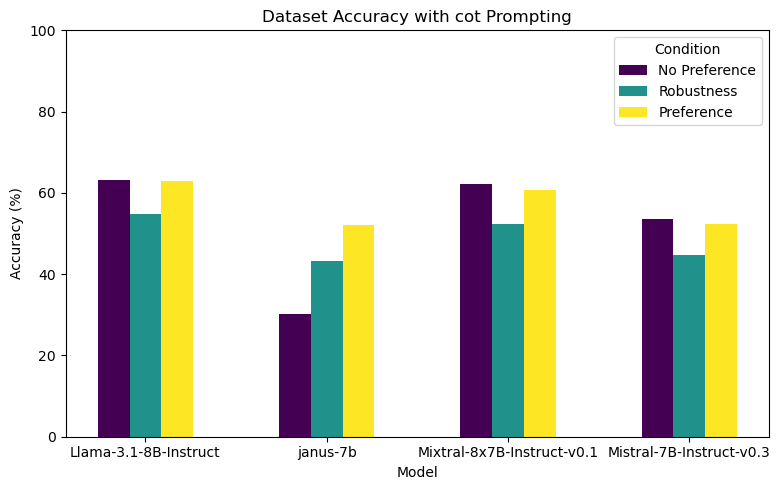

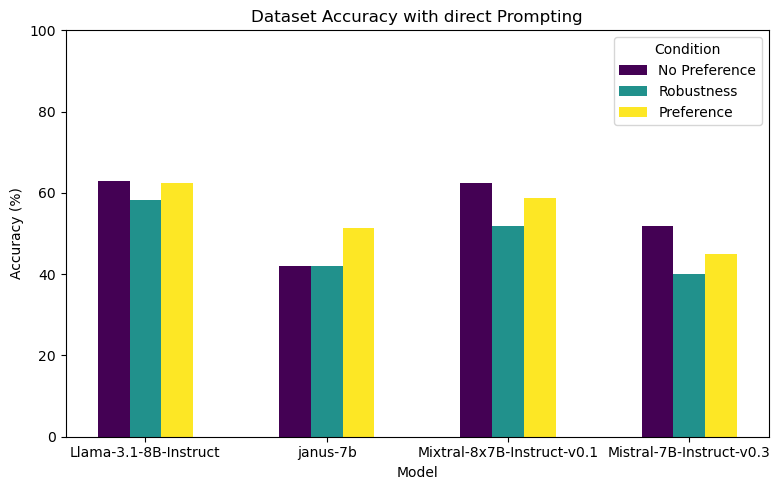

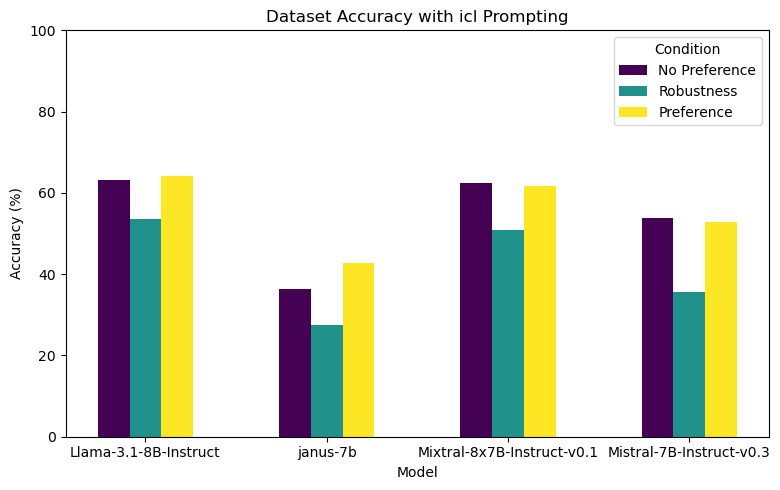

In [ ]:
for i, method in enumerate(PROMPT_METHODS):
    measure_chunk = measures[i*4:(i+1)*4]

    values_nopref = [measure[2][0] for measure in measure_chunk]
    values_robust   = [measure[2][1] for measure in measure_chunk]
    values_pref   = [measure[2][2] for measure in measure_chunk]

    # Define bar width
    bar_width = 0.35

    # Generate positions for groups
    indices = np.arange(len(MODELS))

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Define a colormap and extract a color for each prompt method.
    cmap = plt.get_cmap('viridis', 3)
    colors = [cmap(i) for i in range(3)]

    # Plot the bars for each condition, offsetting the x positions for each set
    bars_nopref = ax.bar(indices - bar_width/2, values_nopref, width=bar_width/2,
                        label="No Preference", color=colors[0])
    # Plot the bars for each condition, offsetting the x positions for each set
    bars_robust = ax.bar(indices, values_robust, width=bar_width/2,
                        label="Robustness", color=colors[1])
    bars_pref   = ax.bar(indices + bar_width/2, values_pref, width=bar_width/2,
                        label="Preference", color=colors[2])

    # Add group labels on the x-axis
    ax.set_xticks(indices)
    ax.set_xticklabels(MODELS)
    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy (%)")
    ax.set_ylim(0, 100)  # Fix y-axis range
    ax.set_title(f"Dataset Accuracy with {method} Prompting")
    ax.legend(title="Condition")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    figpath = os.path.join(stats_folder, f"{criterion}_{dataset_short}_accuracy.png")
    os.makedirs(os.path.dirname(figpath), exist_ok=True)
    plt.savefig(figpath, dpi=300)

    # # Display the plot
    # plt.show()
    plt.close()

## Heatmap of zero shot per dataset

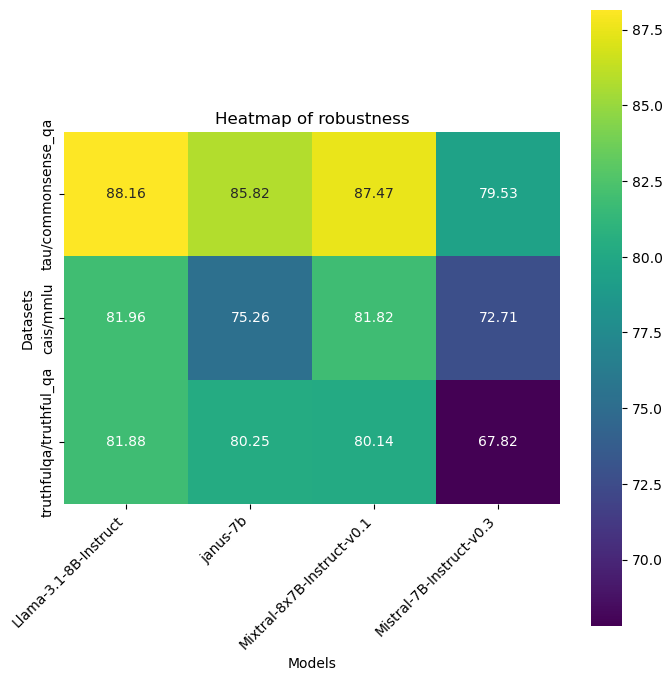

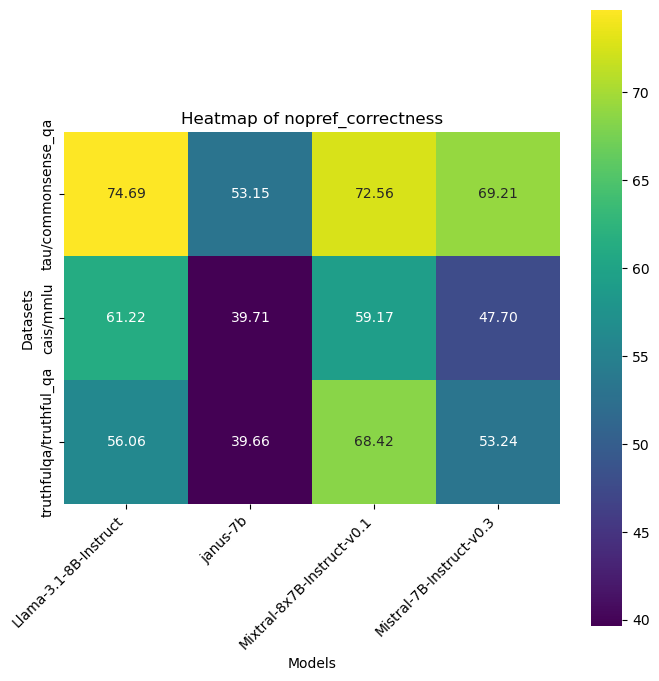

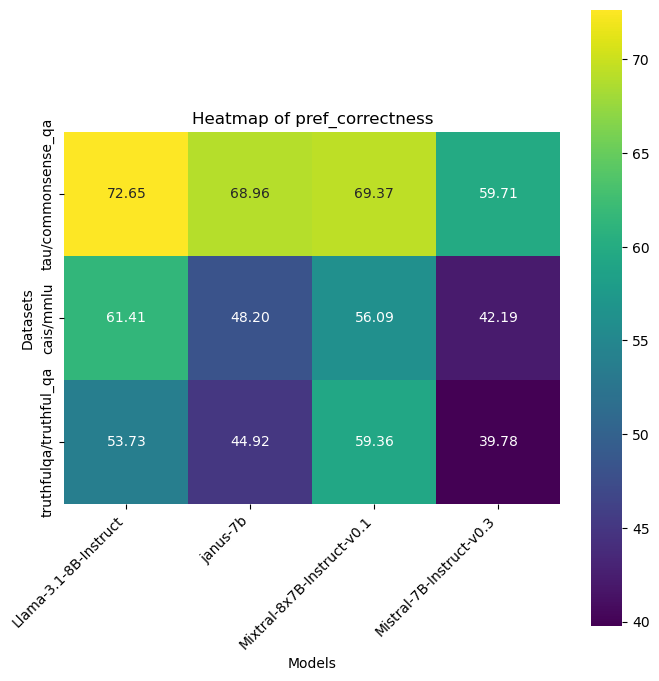

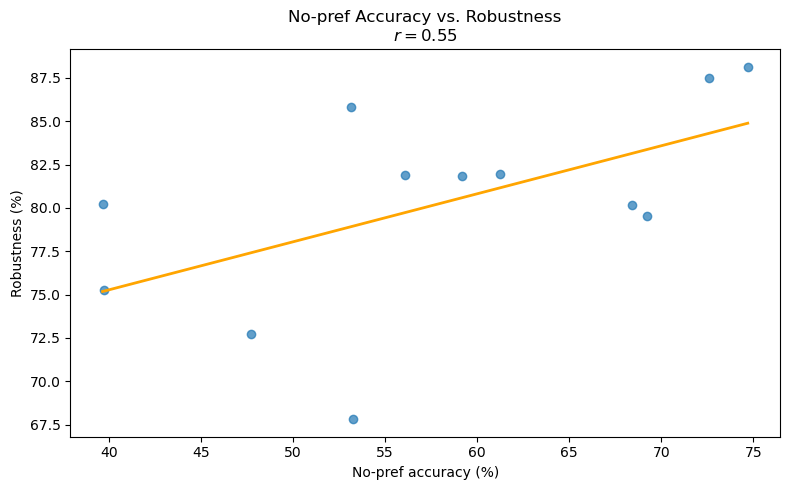

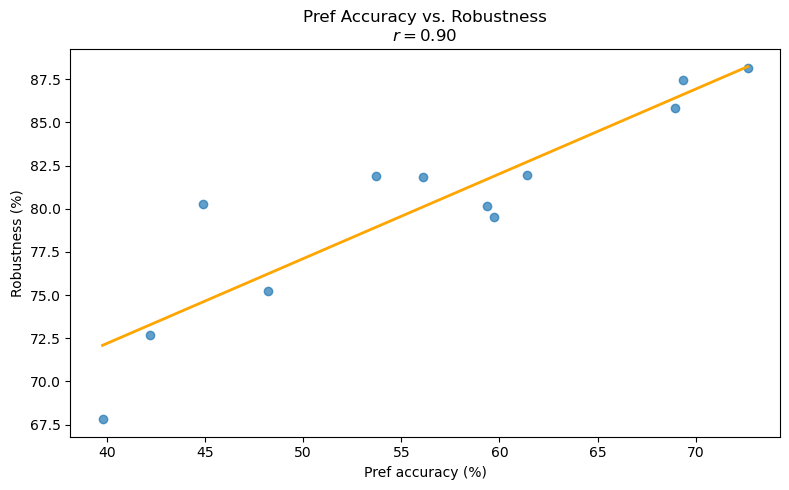

In [ ]:
# Example definitions (replace with your actual lists)

# Dictionaries to store the difference (dataset performance - full dataset performance)
robustness_diff = {}
nopref_diff = {}
pref_diff = {}

# Loop over each model and compute differences
for model in MODELS:
    # Construct the file path for the full dataset
    full_dataset_path = os.path.join("results", "mcq_results", "relevant", "direct", "full", f"{model}-direct-full.csv")
    
    # If the file does not exist, assign NaNs for each dataset
    if not os.path.exists(full_dataset_path):
        print(f"Warning: Full dataset not found for {model}, skipping computation.")
        robustness_diff[model] = {ds: np.nan for ds in DATASETS_FULL}
        nopref_diff[model] = {ds: np.nan for ds in DATASETS_FULL}
        pref_diff[model] = {ds: np.nan for ds in DATASETS_FULL}
        continue

    full_df = pd.read_csv(full_dataset_path)

    # Compute overall full dataset metrics
    full_robustness = full_df.loc[full_df['nopref_correct'] == 1, 'pref_correct'].mean() * 100
    full_nopref = full_df['nopref_correct'].mean() * 100
    full_pref = full_df['pref_correct'].mean() * 100

    # Initialize inner dictionaries for the current model
    robustness_diff[model] = {}
    nopref_diff[model] = {}
    pref_diff[model] = {}

    # Compute metrics for each individual dataset and then their differences versus the full dataset
    for ds in DATASETS_FULL:
        dataset_df = full_df[full_df["source"] == ds]
        # Compute dataset metrics (multiplying by 100 to express percentages)
        ds_robustness = dataset_df.loc[dataset_df['nopref_correct'] == 1, 'pref_correct'].mean() * 100
        ds_nopref = dataset_df['nopref_correct'].mean() * 100
        ds_pref = dataset_df['pref_correct'].mean() * 100
        
        # Calculate differences (dataset - full)
        robustness_diff[model][ds] = ds_robustness
        nopref_diff[model][ds] = ds_nopref
        pref_diff[model][ds] = ds_pref

# Organize each metric difference into a DataFrame.
# Using .from_dict(..., orient='index') returns rows as models.
# We then take .T so rows become datasets and columns become models.
heatmap_data = {
    "robustness": pd.DataFrame.from_dict(robustness_diff, orient="index").T,
    "nopref_correctness": pd.DataFrame.from_dict(nopref_diff, orient="index").T,
    "pref_correctness": pd.DataFrame.from_dict(pref_diff, orient="index").T,
}

# Now, plot a heatmap for each metric
for metric, df in heatmap_data.items():
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(df, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
    # Ensure model names (columns) are rotated for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.title(f'Heatmap of {metric}')
    plt.ylabel("Datasets")
    plt.xlabel("Models")
    
    # Create directory if not existing and save the plot
    figpath = os.path.join(stats_folder, f"{metric}_heatmap.png")
    os.makedirs(os.path.dirname(figpath), exist_ok=True)
    plt.savefig(figpath, dpi=300)
    plt.show()
    plt.close()


# ------------------------------------------------------------------
# Separate scatter plots (8×5 each) with orange regression line
# ------------------------------------------------------------------
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Re‑use dataframes created earlier
robust_df = heatmap_data["robustness"]
nopref_df = heatmap_data["nopref_correctness"]
pref_df   = heatmap_data["pref_correctness"]

# ------------------------------------------------------------------
# Helper to build and save a single plot
# ------------------------------------------------------------------
def make_scatter(x_vals, y_vals, x_label, title, fname):
    # Mask NaNs
    mask = ~np.isnan(x_vals) & ~np.isnan(y_vals)
    x = x_vals[mask]
    y = y_vals[mask]

    # Correlation + best‑fit line
    r_val, _ = pearsonr(x, y)
    m, b = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.7)
    plt.plot(x_line, m * x_line + b, color="orange", linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel("Robustness (%)")
    plt.title(f"{title}\n$r={r_val:.2f}$")
    plt.tight_layout()

    # Save & show
    out_path = os.path.join(stats_folder, fname)
    plt.savefig(out_path, dpi=300)
    plt.show()
    plt.close()

# ------------------------------------------------------------------
# 1) No‑pref accuracy vs. robustness
# ------------------------------------------------------------------
make_scatter(
    x_vals=nopref_df.values.flatten(),
    y_vals=robust_df.values.flatten(),
    x_label="No‑pref accuracy (%)",
    title="No‑pref Accuracy vs. Robustness",
    fname="nopref_vs_robustness_scatter.png"
)

# ------------------------------------------------------------------
# 2) Pref accuracy vs. robustness
# ------------------------------------------------------------------
make_scatter(
    x_vals=pref_df.values.flatten(),
    y_vals=robust_df.values.flatten(),
    x_label="Pref accuracy (%)",
    title="Pref Accuracy vs. Robustness",
    fname="pref_vs_robustness_scatter.png"
)

## Bar Plot of Prompt Methods

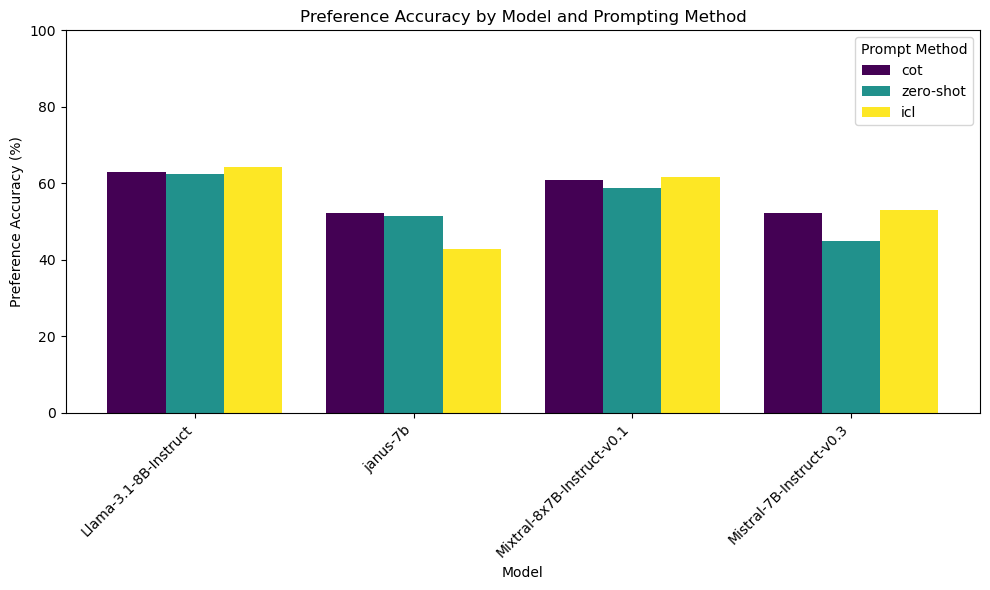

In [ ]:
# Initialize a nested dictionary to store the preference accuracy values.
# We use a list for each (model, prompt method) so that if there are multiple entries,
# we can average the results.
results = {model: {method: [] for method in PROMPT_METHODS} for model in MODELS}

# Process each valid combination.
for method, model, full_dataset_path in valid_combinations:
    if full_dataset_path is None:
        print(f"Skipping {method}, {model} as no full dataset found.")
        value = 0.0
    else:
        full_df = pd.read_csv(full_dataset_path)
        # Compute the preference correctness (mean of 'pref_correct' * 100).
        value = full_df['pref_correct'].mean() * 100
    results[model][method].append(value)

# In case there are multiple entries per (model, method) combination,
# average them. If there are no entries, we keep 0.0.
for model in results:
    for method in results[model]:
        if results[model][method]:
            results[model][method] = np.mean(results[model][method])
        else:
            results[model][method] = 0.0

# Prepare the data for plotting.
# The x-axis groups are by model.
indices = np.arange(len(MODELS))

# For each prompt method, collect a list of accuracy values in the same order as MODELS.
bar_data = {}
for method in PROMPT_METHODS:
    bar_data[method] = [results[model][method] for model in MODELS]

# Set up parameters for the grouped bar chart.
num_methods = len(PROMPT_METHODS)
total_width = 0.8  # Total width of all bars in a group.
bar_width = total_width / num_methods

# Create the bar plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap and extract a color for each prompt method.
cmap = plt.get_cmap('viridis', num_methods)
colors = [cmap(i) for i in range(num_methods)]

# Plot each prompt method’s bars, offsetting their positions within each group.
for i, method in enumerate(PROMPT_METHODS):
    if method == "direct":
        print_method = "zero-shot"
    else:
        print_method = method
    offset = (i - (num_methods - 1) / 2) * bar_width  # Center the bars in each group.
    ax.bar(indices + offset, bar_data[method], width=bar_width, label=print_method, color=colors[i])

# Label the x-axis with model names.
ax.set_xticks(indices)
# ax.set_xticklabels(MODELS)
ax.set_xticklabels(MODELS, rotation=45, ha="right")
ax.set_xlabel("Model")
ax.set_ylabel("Preference Accuracy (%)")
ax.set_ylim(0, 100)  # Fix y-axis range
ax.set_title("Preference Accuracy by Model and Prompting Method")
ax.legend(title="Prompt Method")

plt.tight_layout()

# Save the plot.
figpath = os.path.join(stats_folder, f"{criterion}_{dataset_short}_preference_accuracy.png")
os.makedirs(os.path.dirname(figpath), exist_ok=True)
plt.savefig(figpath, dpi=300)

# Display the plot.
plt.show()
plt.close()


## Make the line graph

/var/folders/td/cprp00894xq2p_fbrnfj89vr0000gn/T/ipykernel_94129/204394305.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


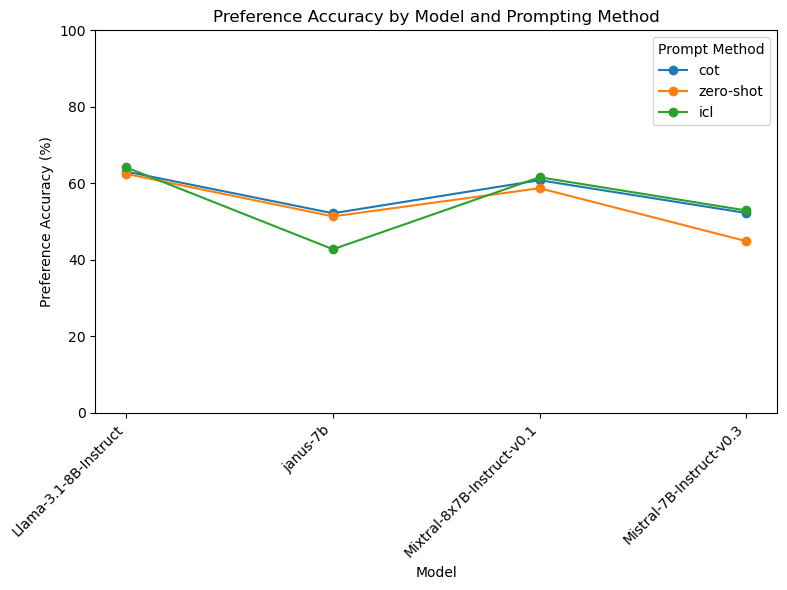

In [ ]:
# Create a new figure for the line plot.
fig, ax = plt.subplots(figsize=(8, 6))

# For each prompt method, extract the accuracy values across models and plot them.
for method in PROMPT_METHODS:
    # Use a different label if the method is "direct"
    print_method = "zero-shot" if method == "direct" else method
    
    # Generate a list of accuracy values for this prompt method in the same order as MODELS.
    y_values = [results[model][method] for model in MODELS]
    
    # Create the line graph with markers.
    ax.plot(MODELS, y_values, marker='o', label=print_method)

# Label axes, set limits, title, and legend.
ax.set_xlabel("Model")
ax.set_ylabel("Preference Accuracy (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylim(0, 100)  # Fix the y-axis range
ax.set_title("Preference Accuracy by Model and Prompting Method")
ax.legend(title="Prompt Method")

plt.tight_layout()

# Save the plot to a file. Adjust the path and filename as required.
figpath = os.path.join(stats_folder, f"{criterion}_{dataset_short}_preference_accuracy_line.png")
os.makedirs(os.path.dirname(figpath), exist_ok=True)
plt.savefig(figpath, dpi=300)

# Display the plot.
plt.show()
plt.close()

## New Metrics